# Impact of promotions on sales and customer data

In [1]:
#Importing python packages and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import datetime as dt


### Reading the csv file formats

In [2]:
df_sample_submission = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\sample_submission.csv")
df_sample_submission.head(10) #first 10 entries of the dataset

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [3]:
df_store = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\store.csv")
df_store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\test.csv")
df_test.tail(10) #last 10 entries

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41078,41079,1104,6,2015-08-01,1.0,0,0,0
41079,41080,1105,6,2015-08-01,1.0,0,0,0
41080,41081,1106,6,2015-08-01,1.0,0,0,0
41081,41082,1107,6,2015-08-01,1.0,0,0,0
41082,41083,1109,6,2015-08-01,1.0,0,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [5]:
df_train = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\train.csv", low_memory = False)
df_train.head(10) #first 10 entries and main dataset to be focused on

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


### Data Exploration

---


**Trying to understand what the dataset entails, its features, qualities and characteristics inorder to formulate hypothesis, draw conclusions, discover insights with strong and detailed phases of visualization.
Making use of some methods like info(), describe() and dtypes().**

In [6]:
#inspecting the dataframe
df_sample_submission.info()

df_store.info()

df_test.info()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null 

**The train dataset being our main focus shows that it has 9 columns and 1017209 rows**

In [7]:
#summary statistics
df_sample_submission.describe()


,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [8]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [10]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
df_train.dtypes #shows the datatypes for all the columns 

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [12]:
df_train.shape #shows the shape of the dataset

(1017209, 9)

In [13]:
df_store.info()
df_store.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
557,558,a,a,3000.0,2.0,2010.0,0,NaN,NaN,NaN
330,331,a,c,670.0,NaN,NaN,1,14.0,2015.0,"Jan,Apr,Jul,Oct"
734,735,d,c,1920.0,4.0,2005.0,0,NaN,NaN,NaN
375,376,a,a,160.0,8.0,2012.0,0,NaN,NaN,NaN
922,923,a,a,280.0,9.0,2008.0,0,NaN,NaN,NaN
348,349,c,c,1490.0,4.0,2009.0,0,NaN,NaN,NaN
1051,1052,a,c,5080.0,NaN,NaN,1,31.0,2013.0,"Feb,May,Aug,Nov"
715,716,d,a,3200.0,1.0,2008.0,1,22.0,2011.0,"Jan,Apr,Jul,Oct"
709,710,d,a,1500.0,9.0,2008.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
409,410,c,a,40.0,11.0,2011.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
#Looking into numerical missing values in store dataset in style
null = pd.DataFrame(df_store.isna().sum(), columns= ['Null Values'])
null['% Missing Values'] = (df_store.isna().sum()/len(df_train)*100)
null = null[null['% Missing Values']>0]
null.style.background_gradient(cmap = 'viridis', low = 0.2,high = 0.1)

,Null Values,% Missing Values
CompetitionDistance,3,0.000295
CompetitionOpenSinceMonth,354,0.034801
CompetitionOpenSinceYear,354,0.034801
Promo2SinceWeek,544,0.053480
Promo2SinceYear,544,0.053480
PromoInterval,544,0.053480


### Working with Dates

---


**The year column, the Month Name and Month No needs to be added .**

In [15]:
#Changing the Date column datatype in train dataset to datetime
df_train["Date"] = pd.to_datetime(df_train["Date"])

In [16]:
#Let's add Year, the Month No and Month Name to the DataFrame

df_train["Year"] =  df_train["Date"].dt.year 

df_train["Month No"] = df_train["Date"].dt.month

df_train["Month"] = df_train["Date"].dt.month_name()

df_train["Day"] = df_train["Date"].dt.day

#previewing the DataFrame
df_train.sample(10)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month No       1017209 non-null  int64         
 11  Month          1017209 non-null  object        
 12  Day            1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 100.9+ MB


In [17]:
#converting Year column datatype
df_train["Year"] = df_train.Year.sort_values(ascending = True).astype("str")

df_train.dtypes


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
Year                     object
Month No                  int64
Month                    object
Day                       int64
dtype: object

In [18]:
df_train.Year.value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

In [19]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month No,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,July,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,July,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,July,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,July,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,July,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,January,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,January,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,January,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,January,1


In [20]:
def dayNameFromWeekday(DayOfWeek):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days[DayOfWeek] if 0 < DayOfWeek < len(days) else None

### Data Analysis of the Train Dataset

In [21]:
#Analyzing the no of customers and total sales by year
Customers_vs_Sales = df_train.groupby("Year")[["Sales","Customers"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales", "Customers" : "No. of Customers"}).head(10)
Customers_vs_Sales

,Total Sales,No. of Customers
Year,,
2013,2302876084,256004425
2014,2180804896,240488971
2015,1389499643,147548359


In [22]:
#Analyzing total sales based on presence and absence promo
Promo_vs_Sales = df_train.groupby("Promo")[["Sales"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales"}).head(10)
Promo_vs_Sales


,Total Sales
Promo,
1,3101206286
0,2771974337


In [23]:
#Analyzing no of customers based on promo and no promo
Promo_vs_Customers = df_train.groupby("Promo")[["Customers"]].sum().sort_values(by = "Customers", ascending = False).rename(columns = {"Customers" : "No. of Customers"}).head(10)
Promo_vs_Customers

,No. of Customers
Promo,
0,325777807
1,318263948


In [24]:
#Analyzing average sales with and without promo
Promo_vs_Sales1 = df_train.groupby("Promo")[["Sales"]].mean().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Average Sales"}).head(10)
Promo_vs_Sales1

,Average Sales
Promo,
1,7991.152046
0,4406.050805


In [25]:
#Analyzing average sales with and without promo
Promo_vs_Customers1 = df_train.groupby("Promo")[["Customers"]].mean().sort_values(by = "Customers", ascending = False).rename(columns = {"Customers" : "Average No. of Customers"}).head(10)
Promo_vs_Customers1

,Average No. of Customers
Promo,
1,820.098815
0,517.823542


In [26]:
#Analyzing top 10 total sales and no of customers based on date and promo
Aggregation = df_train.groupby(["Date", "Promo"])[["Sales", "Customers"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales", "Customers" : "No of Customers"}).head(10)
Aggregation

,,Total Sales,No of Customers
Date,Promo,,
2013-12-16,1,15623548,1340280
2013-12-23,0,14350056,1518600
2014-06-30,1,13308602,1189439
2013-12-17,1,13053993,1198877
2013-12-02,1,12972440,1199202
2015-03-30,1,12371453,1064757
2013-12-20,1,12334496,1219287
2013-12-18,1,12189674,1158335
2014-12-15,1,12133381,1054956


In [27]:
#Analyzing top 10 total sales and no of customers based on year and promo
Aggregation2 = df_train.groupby(["Year", "Promo"])[["Sales", "Customers"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales", "Customers" : "No. of Customers"}).head(10)
Aggregation2

Total Sales  No. of Customers
Year Promo                               
2013 1       1185236901         123500491
2014 1       1157208136         119254896
2013 0       1117639183         132503934
2014 0       1023596760         121234075
2015 1        758761249          75508561
     0        630738394          72039798

In [28]:
#Analyzing total sales with and without promo across the year
Promo_vs_Sales2 = df_train.groupby(["Year","Promo"])[["Sales"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales"}).head(10)
Promo_vs_Sales2

Total Sales
Year Promo             
2013 1       1185236901
2014 1       1157208136
2013 0       1117639183
2014 0       1023596760
2015 1        758761249
     0        630738394

In [29]:
#Analyzing total sales with and without promo across the year
Promo_vs_Customers2 = df_train.groupby(["Year","Promo"])[["Customers"]].sum().sort_values(by = "Customers", ascending = False).rename(columns = {"Customers" : "Total Customers"}).head(10)
Promo_vs_Customers2

Total Customers
Year Promo                 
2013 0            132503934
     1            123500491
2014 0            121234075
     1            119254896
2015 1             75508561
     0             72039798

In [30]:
#Analyzing average sales with and without promo across the year
Promo_vs_Sales3 = df_train.groupby(["Year","Promo"])[["Sales"]].mean().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Average Sales"}).head(10)
Promo_vs_Sales3

,,Average Sales
Year,Promo,
2014,1,8104.833562
2015,1,8005.921910
2013,1,7874.020269
2015,0,4454.209908
2014,0,4429.716586
2013,0,4358.134300


In [31]:
#Analyzing the no of customers and total sales by store
Customers_vs_Sales = df_train.groupby("Store")[["Sales","Customers"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales", "Customers" : "No. of Customers"}).head(10)
Customers_vs_Sales

,Total Sales,No. of Customers
Store,,
262,19516842,3204694
817,17057867,2454370
562,16927322,2924960
1114,16202585,2509542
251,14896870,1908934
513,14252406,1643527
788,14082141,1346835
733,14067158,3206058
383,13489879,1720249


In [32]:
#Analyzing the no of customers by store and promo
Customers_vs_Sales = df_train.groupby(["Store","Promo"])[["Customers"]].sum().sort_values(by = "Customers", ascending = False).rename(columns = {"Customers" : "No. of Customers"}).head(10)
Customers_vs_Sales

,,No. of Customers
Store,Promo,
262,0,2005815
733,0,1933712
562,0,1737074
769,0,1733906
1114,0,1370004
1097,0,1363079
259,0,1329583
733,1,1272346
817,0,1233110


In [33]:
#Analyzing the total sales by store and promo
Customers_vs_Sales = df_train.groupby(["Store","Promo"])[["Sales"]].sum().sort_values(by = "Sales", ascending = False).rename(columns = {"Sales" : "Total Sales"}).head(10)
Customers_vs_Sales

,,Total Sales
Store,Promo,
262,0,11959889
562,0,9697494
817,1,8884644
1114,0,8426046
733,0,8363499
817,0,8173223
1114,1,7776539
262,1,7556953
251,0,7455474


### Data Visualization of Train Dataset

In [34]:
df_train["Year"].unique()

array(['2015', '2014', '2013'], dtype=object)

In [35]:
#creating a list called cats to store the correct order of year
cats = ["2013", "2014", "2015"]
#importing the categoricaldtype function from the pandas.api.types.module
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
#using astype function to change the data type to an ordered category
df_train['Year' ] = df_train[ 'Year'].astype(cat_type)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

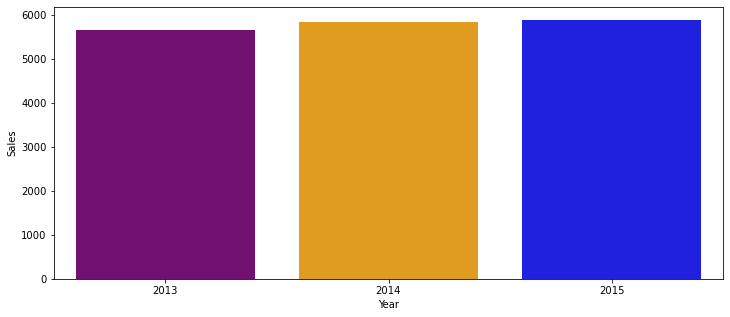

In [36]:
#Visualizing the average sales across the years
colors = {"2013":"purple", "2014": "orange", "2015":"blue"}
plt.figure(figsize = (12,5))
sns.barplot(x="Year",y="Sales",data = df_train, ci = None, palette =colors)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


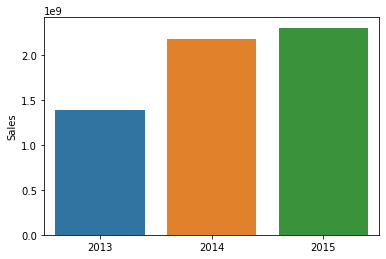

In [37]:
#Visualizing the total sales across the years
ax = sns.barplot(df_train.Year.unique(), df_train.groupby(['Year'])['Sales'].sum())

<Figure size 936x576 with 0 Axes>

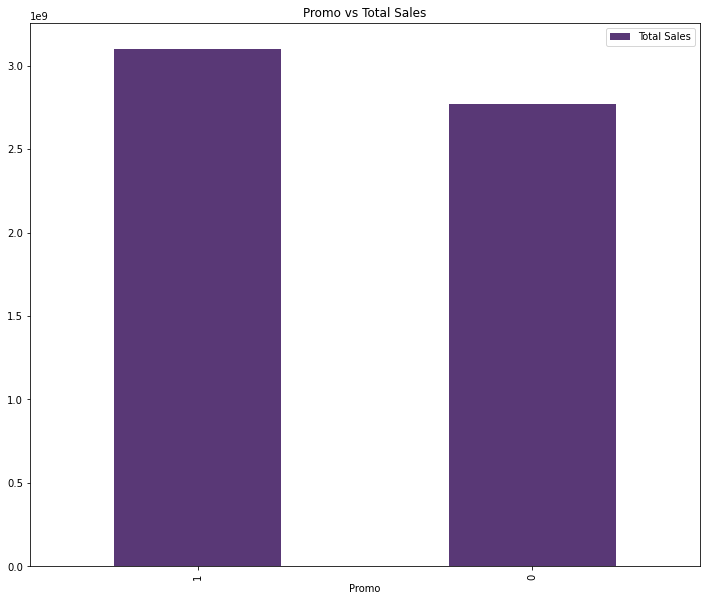

In [38]:
#Visualizing promo vs total sales 
plt.figure(figsize = (13,8))

plt.rcParams["figure.figsize"] = [12,10] # to customize the size; increasing the size of the figure

Promo_vs_Sales.head(10).plot(kind = "bar", color = "#593876")

plt.title("Promo vs Total Sales")
plt.show();

<Figure size 936x576 with 0 Axes>

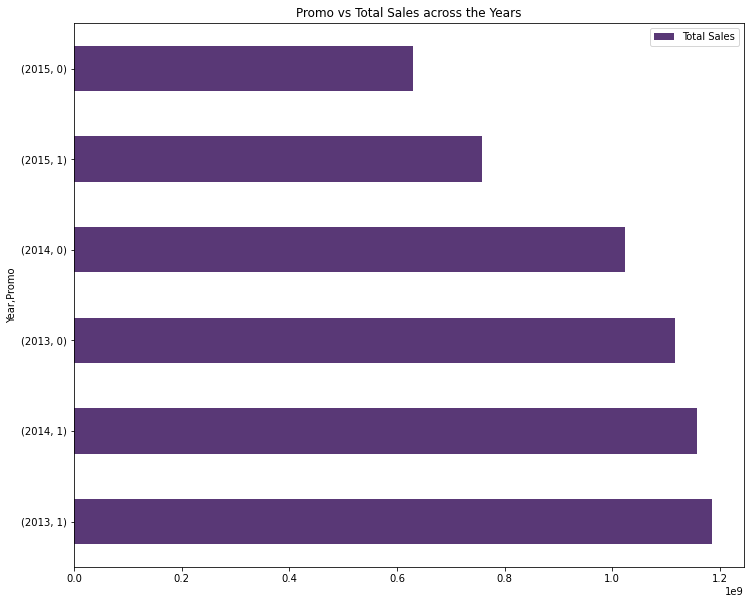

In [39]:
#Visualizing promo vs total sales across the years
plt.figure(figsize = (13,8))

plt.rcParams["figure.figsize"] = [12,10] # to customize the size; increasing the size of the figure

Promo_vs_Sales2.head(10).plot(kind = "barh", color = "#593876")

plt.title("Promo vs Total Sales across the Years")
plt.show();

<Figure size 576x216 with 0 Axes>

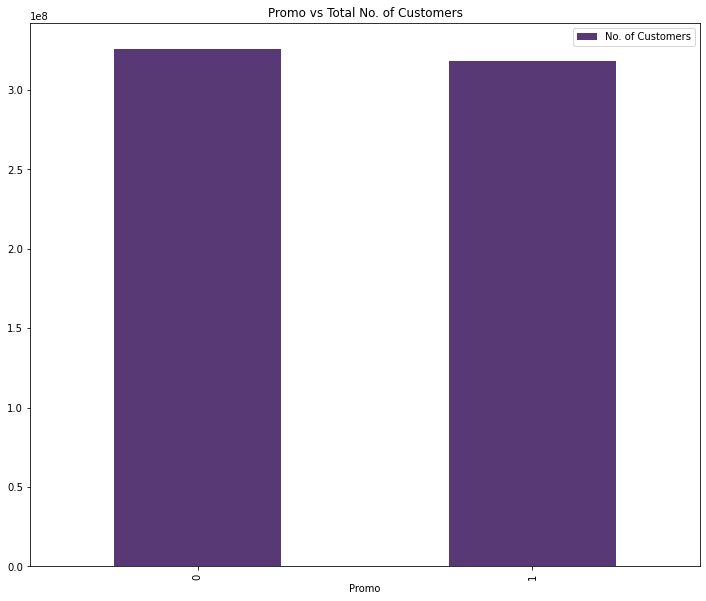

In [40]:
#Visualizing promo vs total no of.customers
plt.figure(figsize = (8,3))

plt.rcParams["figure.figsize"] = [12,10] # to customize the size; increasing the size of the figure

Promo_vs_Customers.head(10).plot(kind = "bar", color = "#593876")

plt.title("Promo vs Total No. of Customers")
plt.show();

<Figure size 936x576 with 0 Axes>

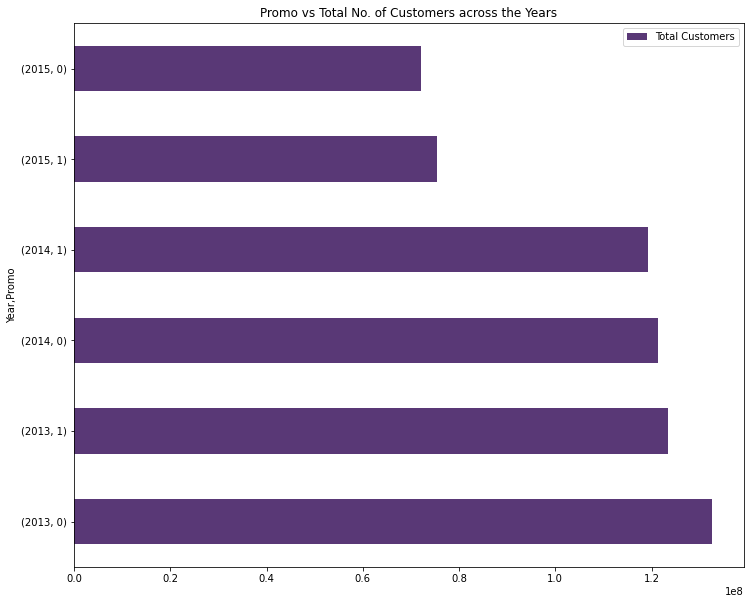

In [41]:
#Visualizing promo vs total no of customers across the years
plt.figure(figsize = (13,8))

plt.rcParams["figure.figsize"] = [12,10] # to customize the size; increasing the size of the figure

Promo_vs_Customers2.head(10).plot(kind = "barh", color = "#593876")

plt.title("Promo vs Total No. of Customers across the Years")
plt.show();

<AxesSubplot:xlabel='Year', ylabel='Sales'>

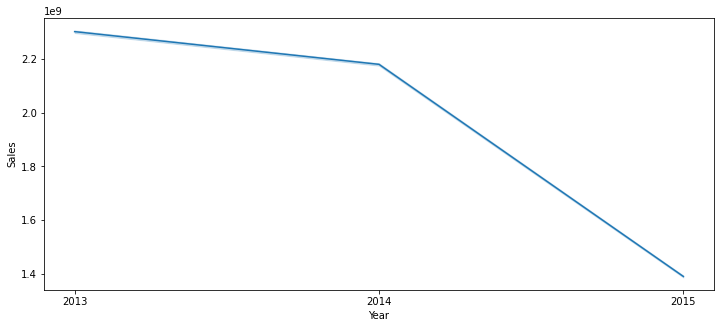

In [42]:
#Visualizing total sales by year
plt.figure(figsize = (12,5))
sns.lineplot(x="Year",y="Sales",data = df_train, estimator = "sum")



<AxesSubplot:xlabel='Year', ylabel='Customers'>

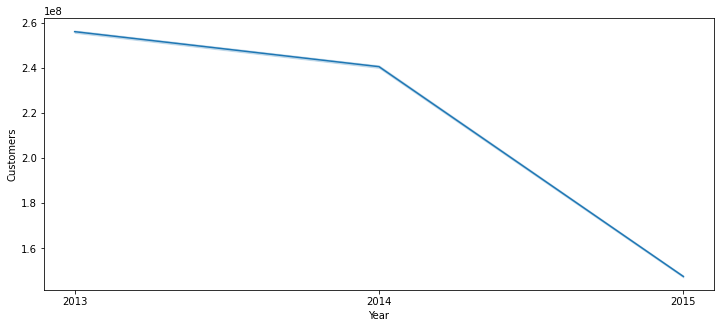

In [43]:
#Visualizing no. of customers by year
plt.figure(figsize = (12,5))
sns.lineplot(x="Year",y="Customers",data = df_train, estimator = "sum")

In [44]:
cats = [ "January","February","March","April", "May","June","July", "August", "September", "October", "November", "December"]
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_train['Month' ] = df_train[ 'Month'].astype(cat_type)

In [45]:
df_train["Month"].value_counts()

March        103695
May          103695
January      103694
April        100350
June         100350
July          98115
February      93660
August        63550
October       63550
December      63550
September     61500
November      61500
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Sales'>

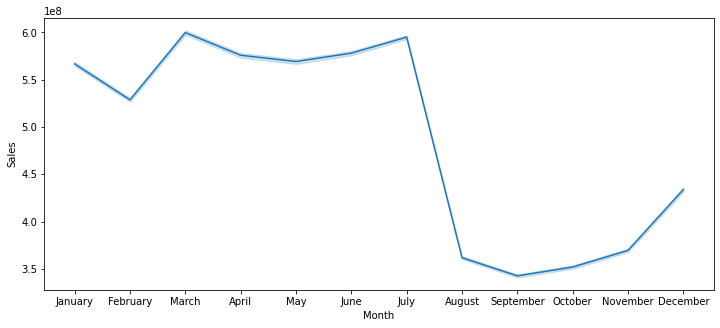

In [46]:
#Visualizing total sales by month
plt.figure(figsize=(12,5))
sns.lineplot(x="Month",y="Sales",data = df_train, estimator = "sum")

<AxesSubplot:xlabel='Month', ylabel='Customers'>

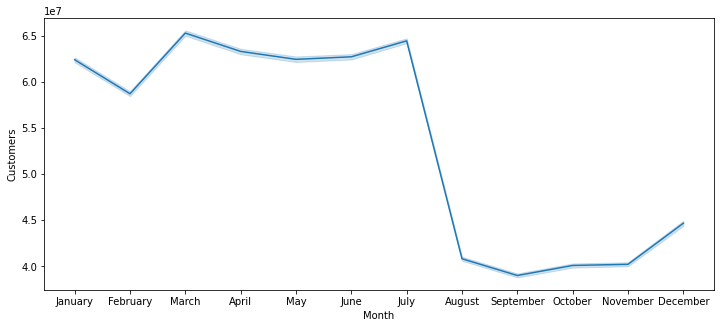

In [47]:
#Visualizing no. of customers by month
plt.figure(figsize = (12,5))
sns.lineplot(x="Month",y="Customers",data = df_train, estimator = "sum")

In [48]:
df_train["DayOfWeek"] = df_train["Date"].dt.day_name()

In [49]:
cats = [ "Sunday","Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday"]
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_train['DayOfWeek' ] = df_train[ 'DayOfWeek'].astype(cat_type)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

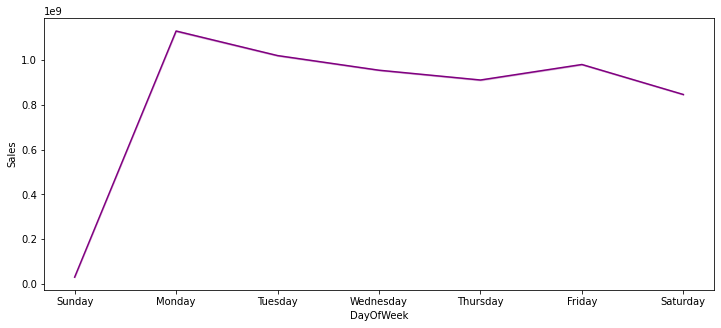

In [50]:
#Visualizing total sales by day of the week
plt.figure(figsize = (12,5))
sns.lineplot(x="DayOfWeek",y="Sales",data = df_train, estimator = "sum", color = "purple")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

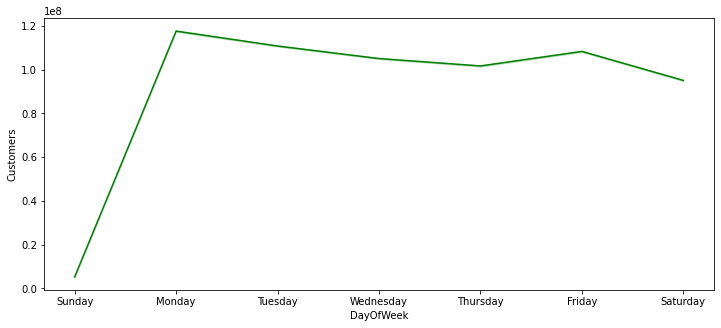

In [51]:
#Visualizing no. of customers by day of the week
color = "#AAF0D1"
plt.figure(figsize = (12,5))
sns.lineplot(x="DayOfWeek",y="Customers",data = df_train, estimator = "sum", color = "green")

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

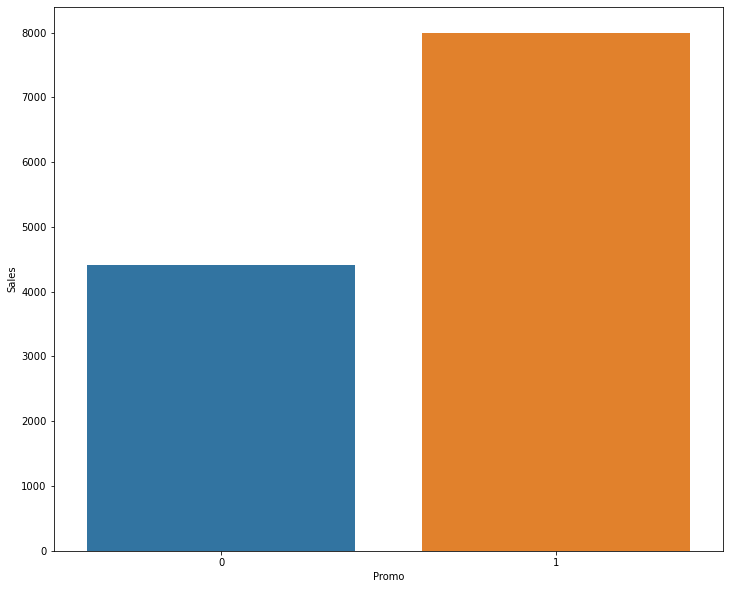

In [52]:
#Visualizing total sales by promo
sns.barplot(x="Promo",y="Sales",data = df_train, ci = None)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

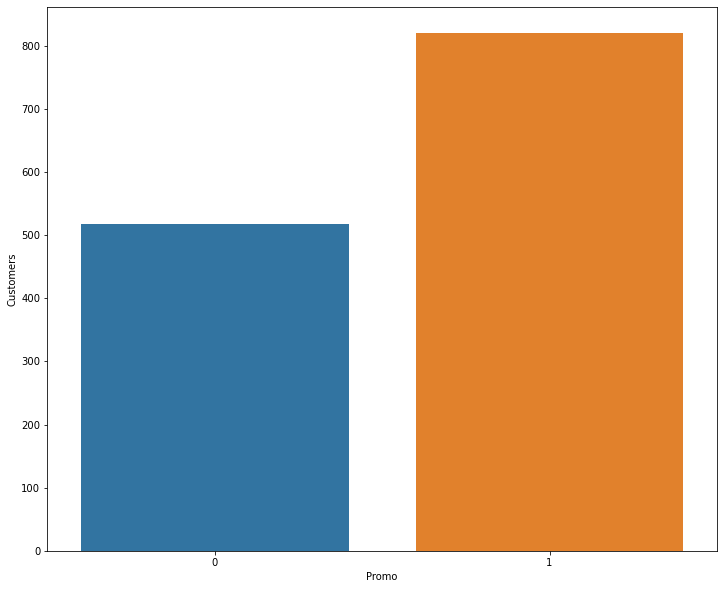

In [53]:
#Visualizing total no. of customers by promo
sns.barplot(x="Promo",y="Customers",data = df_train, ci = None)

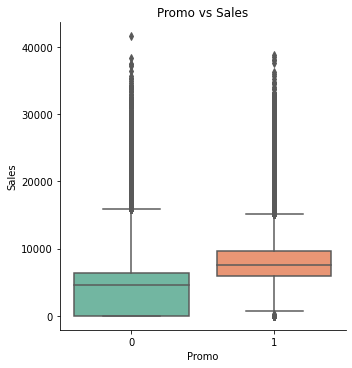

In [54]:
sns.catplot(
    x = "Promo",
    y = "Sales",
    data = df_train,
    kind = "box" ,
    palette = sns.color_palette("Set2")

)
plt.title("Promo vs Sales");

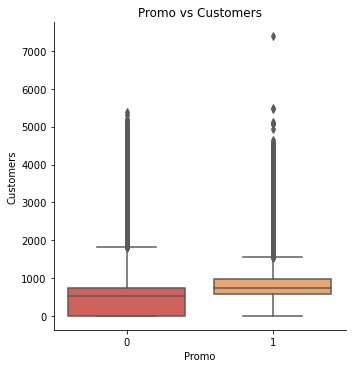

In [55]:
sns.catplot(
    x = "Promo",
    y = "Customers",
    data = df_train,
    kind = "box",
    palette = sns.color_palette("Spectral")

)
plt.title("Promo vs Customers");

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

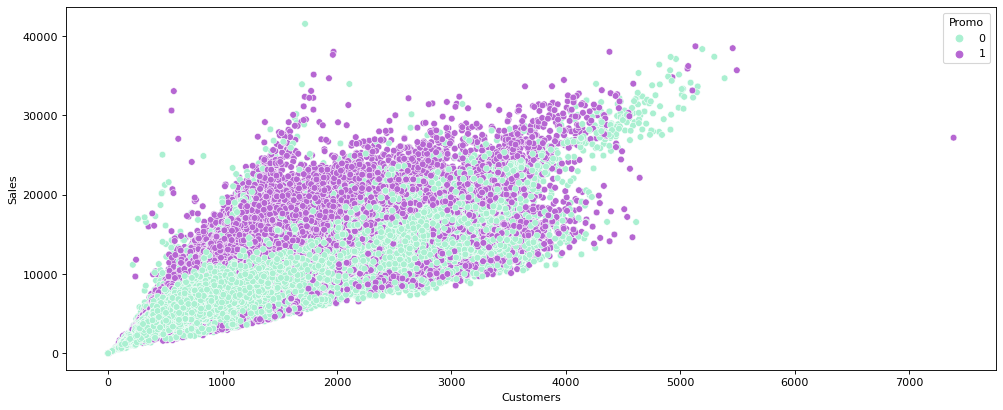

In [56]:
plt.figure(figsize = (15,6), dpi = 80)
Colors = {0:"#AAF0D1", 1:"#B666D2"}
sns.scatterplot(
x = "Customers",
y = "Sales",
hue = "Promo",
data = df_train, 
alpha = 1,
x_jitter = 0.9,
palette = Colors)

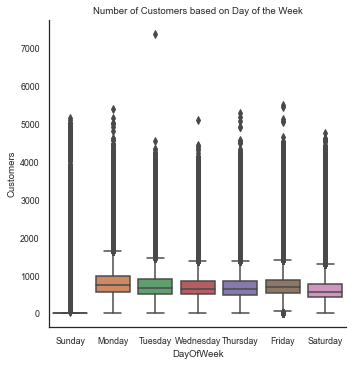

In [57]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=0.8, style='white')

sns.catplot(
    x = "DayOfWeek",
    y = "Customers",
    data = df_train,
    kind = "box" 


)
plt.title("Number of Customers based on Day of the Week");